In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


- Text-to-Audio Retrieval score

In [ ]:
def score_graph(data_list, title_list):

    num_graphs = len(data_list)

    fig, axes = plt.subplots(1, num_graphs, figsize=(30, 10))

    for idx, (data, title) in enumerate(zip(data_list, title_list)):
        df = pd.DataFrame(data)


        sns.set(style="whitegrid")
        palette = sns.color_palette("husl", len(df.columns))

        linestyles = ['dashed', 'dashdot', 'dotted']
        markers = ['o', 's', '^']

        for i, (col, linestyle, marker) in enumerate(zip(df.columns, linestyles, markers)):
            sns.lineplot(x=['r1', 'r5', 'r10', 'mAP10'], y=col, data=df, label=col, palette=[palette[i]], linestyle=linestyle, ax=axes[idx])


            for x, y in zip(['r1', 'r5', 'r10', 'mAP10'], df[col]):
                axes[idx].scatter(x, y, color=palette[i], marker=marker, s=30)
                axes[idx].text(x, y, f'{y:.3f}', ha='left', va='bottom', color=palette[i], fontsize=9)


        axes[idx].set_yticks([i * 0.05 + 0.1 for i in range(11)])
        axes[idx].set_ylim(0.1, 0.55)


        axes[idx].grid(axis='y', linestyle='--')


        axes[idx].set_title(title, fontsize=17)
        axes[idx].set_xlabel('Rank')
        axes[idx].set_ylabel('Scores')
        axes[idx].legend()

    plt.tight_layout()
    #plt.savefig('fig_name.jpg')
    plt.show()


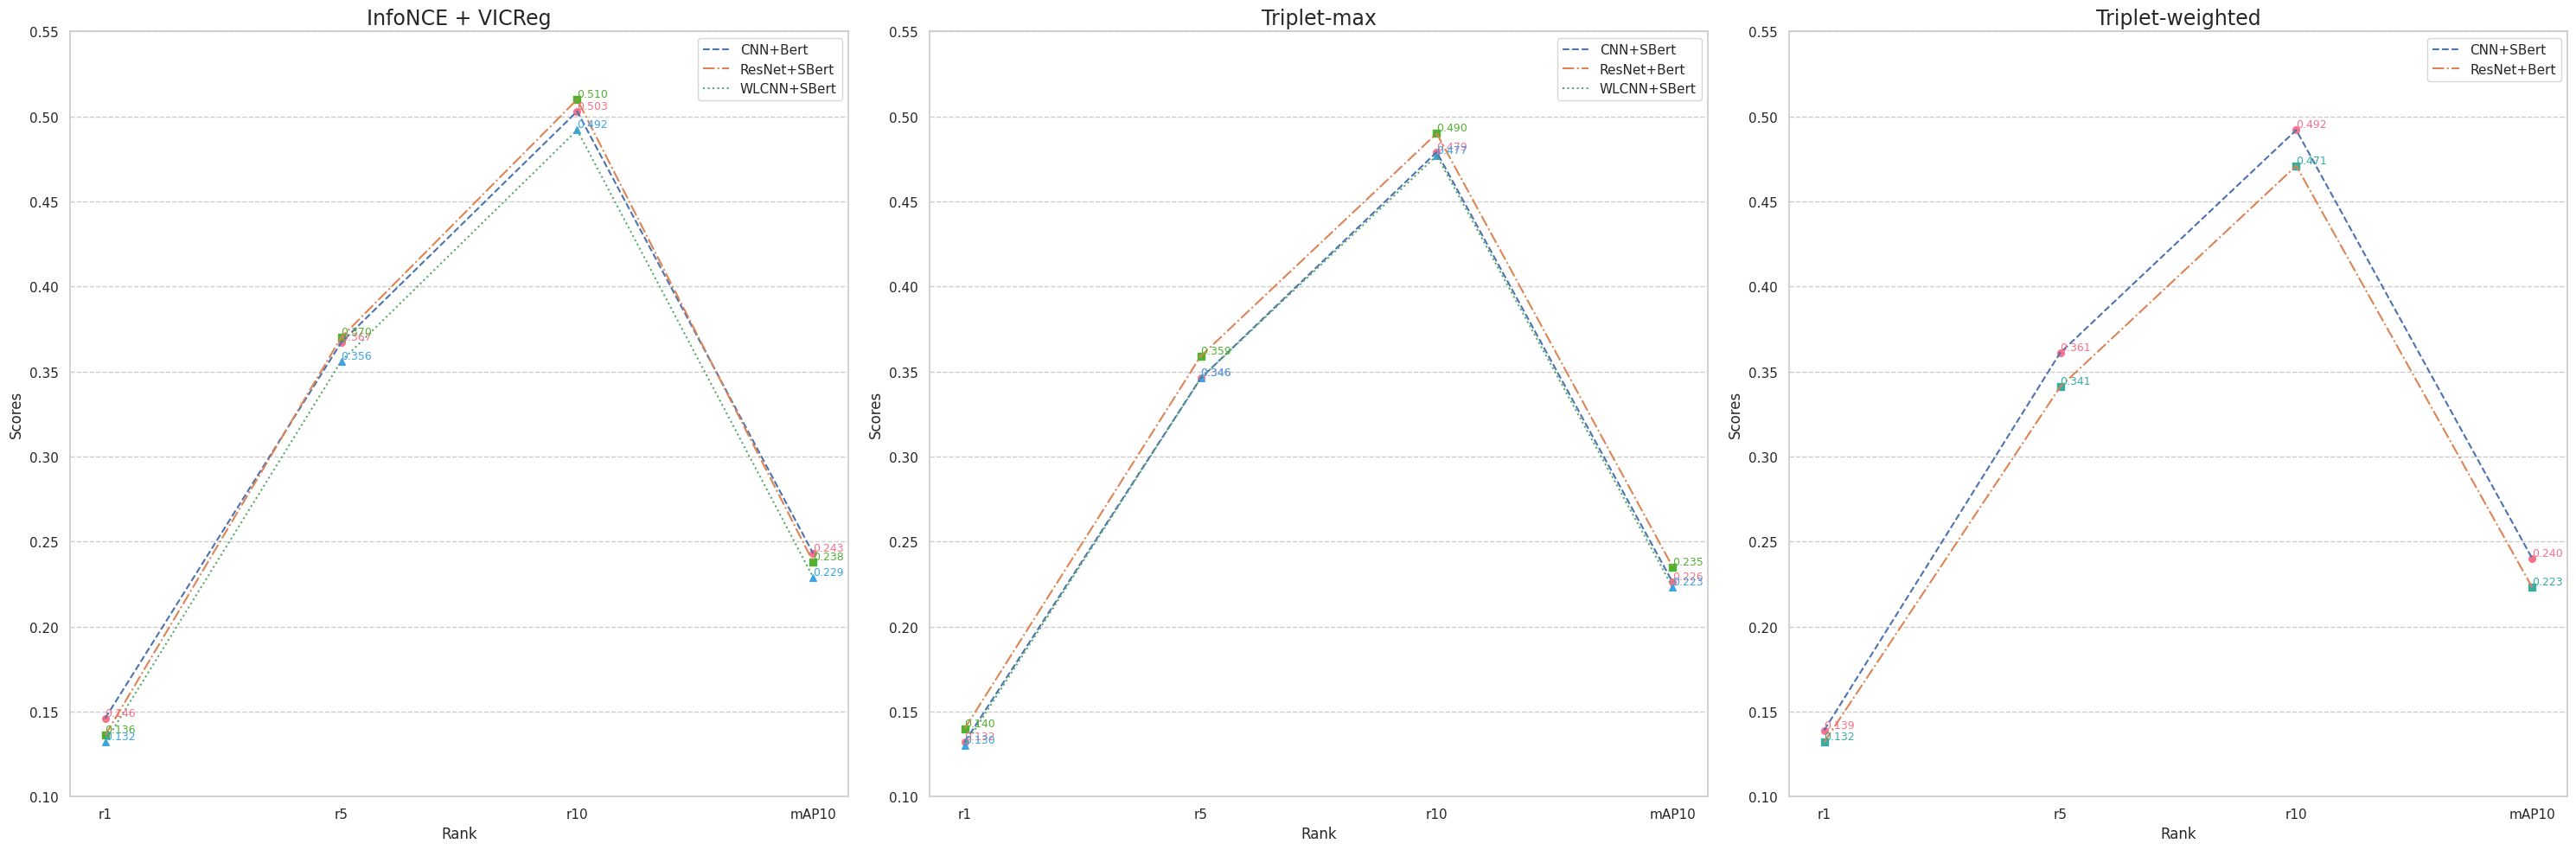

In [ ]:
data_list = [
    {
        'CNN+Bert': [0.146, 0.367, 0.503, 0.243],
        'ResNet+SBert': [0.136, 0.370, 0.510, 0.238],
        'WLCNN+SBert': [0.132, 0.356, 0.492, 0.229]
    },

    {
        'CNN+SBert': [0.132, 0.346, 0.479, 0.226],
        'ResNet+Bert': [0.140, 0.359, 0.490, 0.235],
        'WLCNN+SBert': [0.130, 0.346, 0.477, 0.223]
    },

    {
        'CNN+SBert': [0.139, 0.361, 0.492, 0.240],
        'ResNet+Bert': [0.132, 0.341, 0.471, 0.223]
    }
]

title_list = ["InfoNCE + VICReg", "Triplet-max", "Triplet-weighted"]

score_graph(data_list, title_list)

# from google.colab import files
# files.download('fig_name.jpg')

- Audio-to-Text Retrieval score

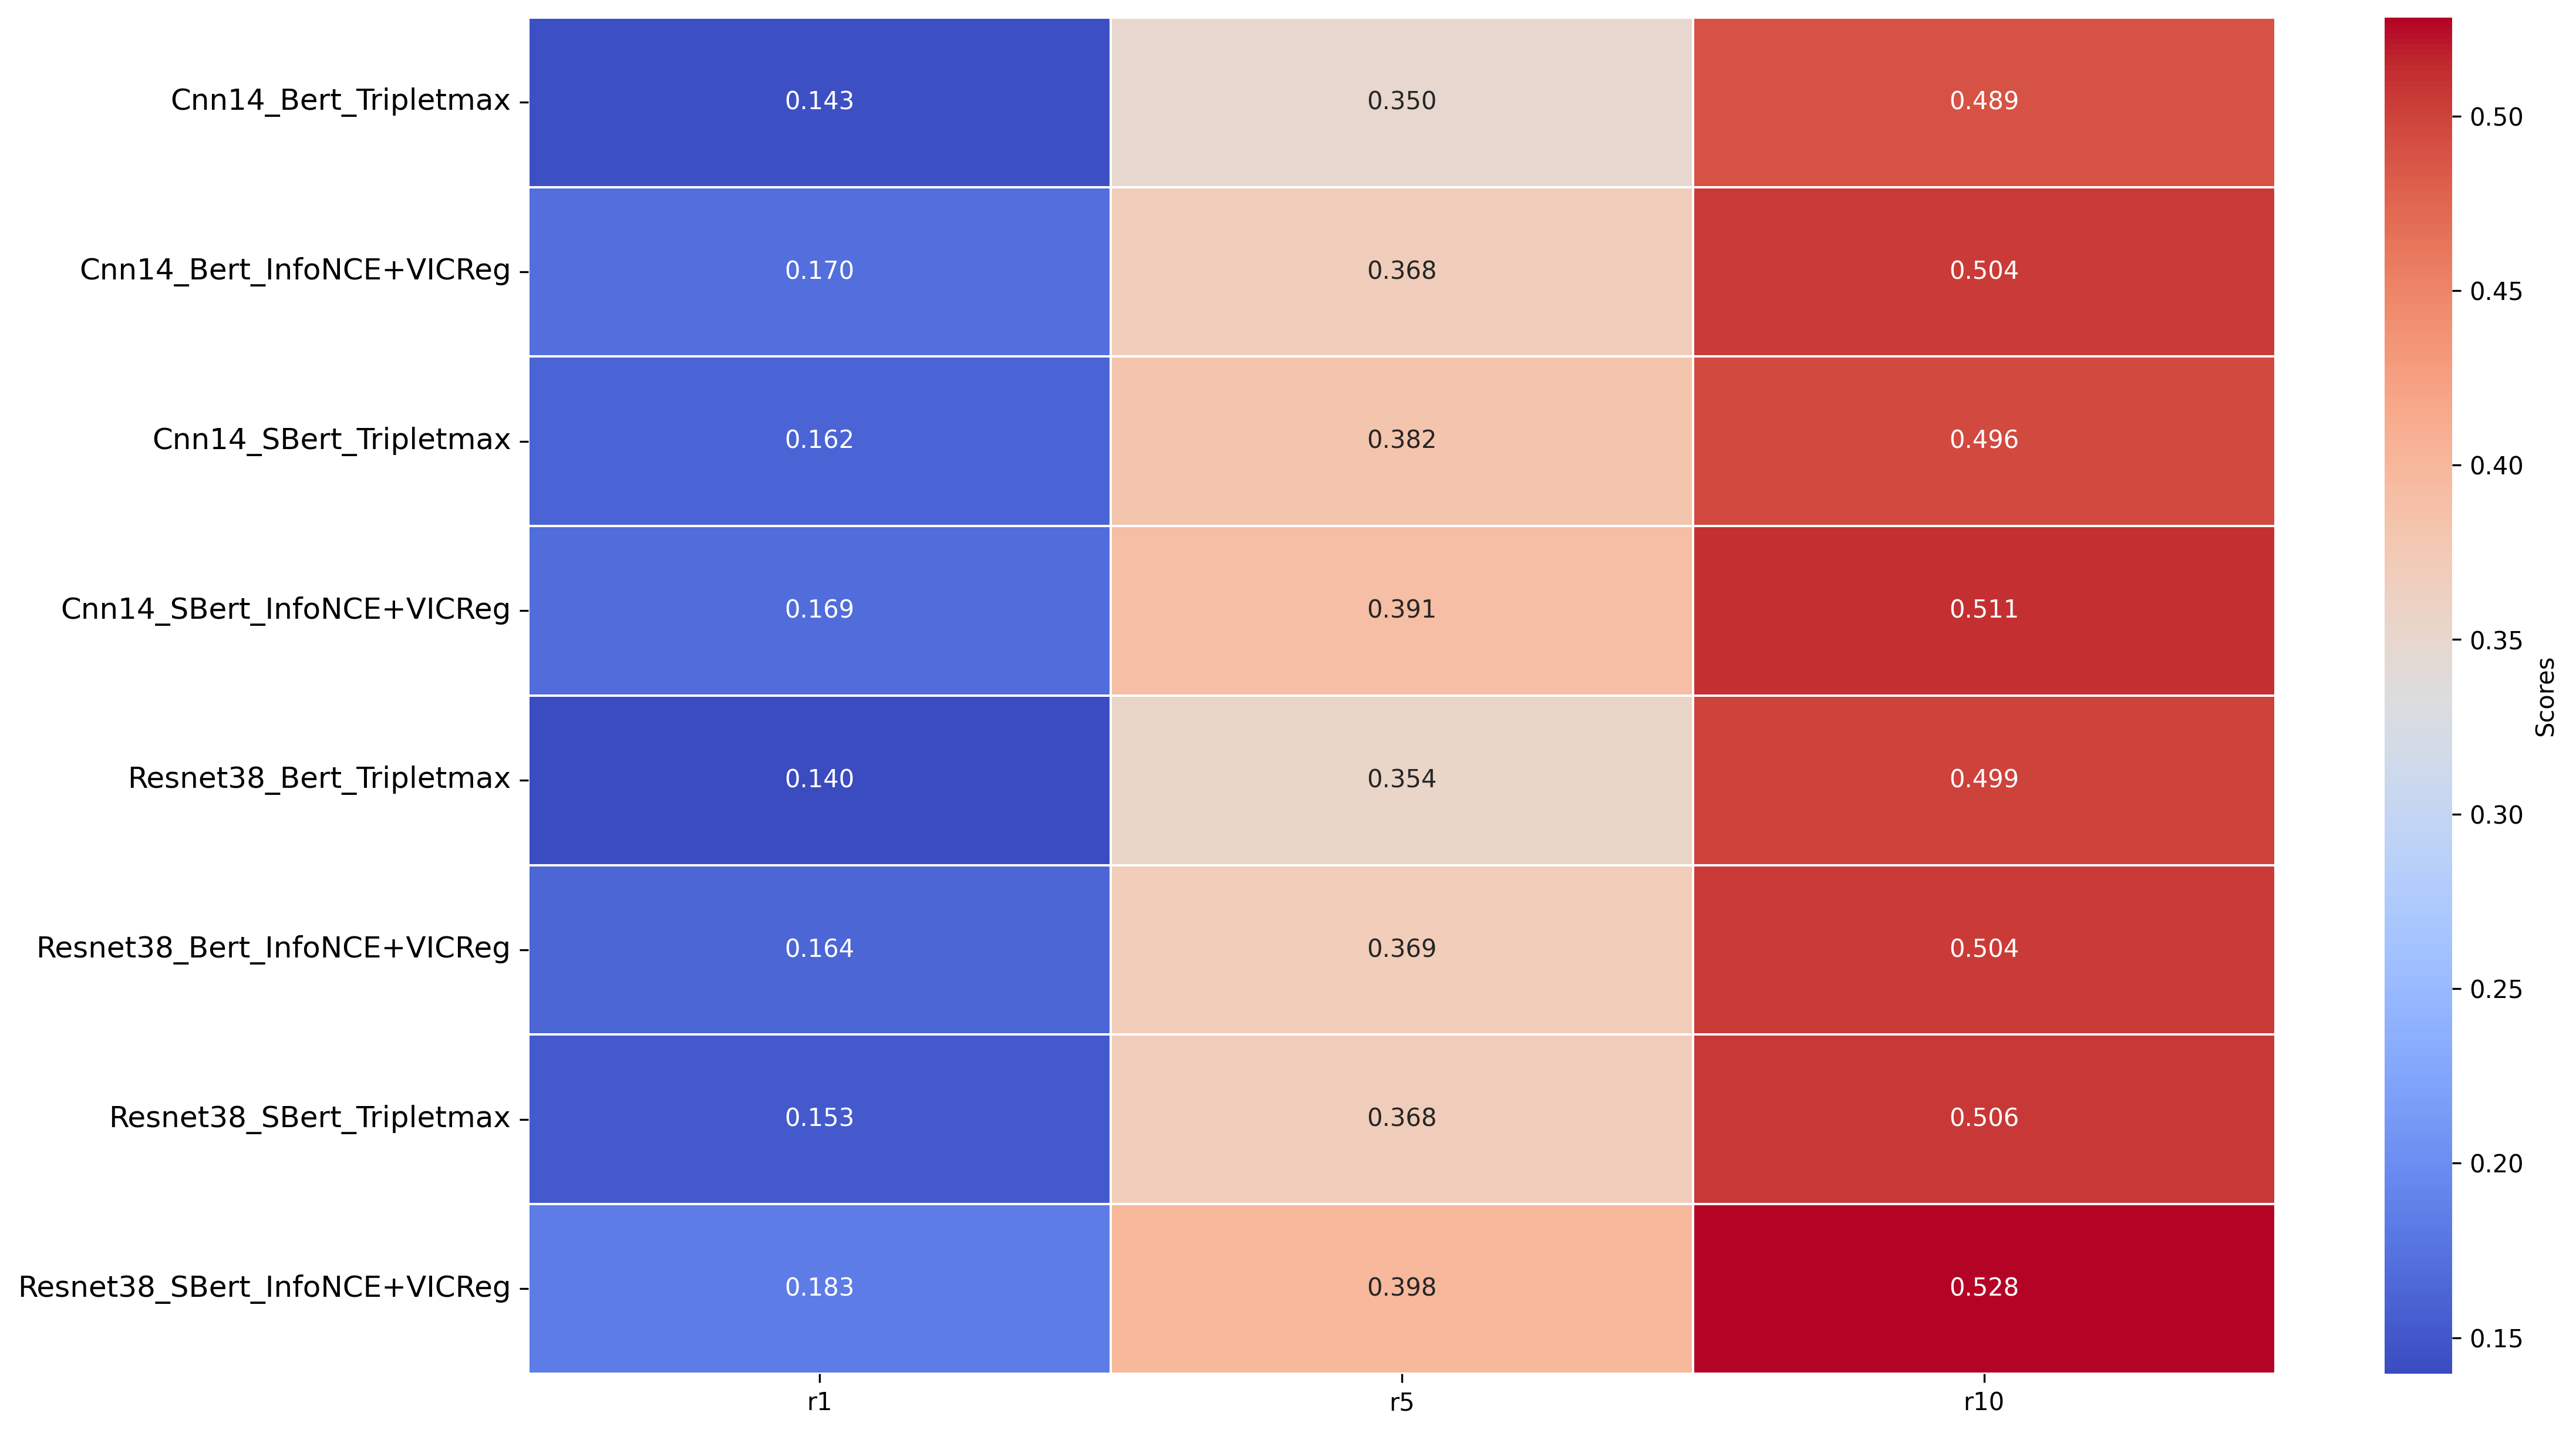

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Cnn14_Bert_Tripletmax': [0.1435, 0.3502, 0.489],
    'Cnn14_Bert_InfoNCE+VICReg': [0.1703, 0.3684, 0.5043],
    'Cnn14_SBert_Tripletmax': [0.1617, 0.3818, 0.4957],
    'Cnn14_SBert_InfoNCE+VICReg': [0.1694, 0.3914, 0.511],
    'Resnet38_Bert_Tripletmax': [0.1397, 0.3541, 0.4995],
    'Resnet38_Bert_InfoNCE+VICReg': [0.1636, 0.3694, 0.5043],
    'Resnet38_SBert_Tripletmax': [0.1531, 0.3684, 0.5062],
    'Resnet38_SBert_InfoNCE+VICReg': [0.1828, 0.3981, 0.5282]
}

df = pd.DataFrame(data, index=['r1', 'r5', 'r10'])


plt.figure(figsize=(16, 10), dpi=300)  
heatmap = sns.heatmap(df.transpose(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, cbar_kws={'label': 'Scores'})

heatmap.set_yticklabels(heatmap.get_yticklabels(), size=12)
#plt.title('Audio to Text Retrieval', fontsize=18)  
#plt.savefig('heatmap.jpg', bbox_inches='tight')  
plt.show()

# from google.colab import files
# files.download('heatmap.jpg')